# stochastic multi arm bandits

In this jupyther python notebook, we want to design and conduct an experiment for nonstationary stochastic multi arm bandits.
We start with the  10-armed testbed in which all the q(a) start out equal and then take independent random walks (by adding
a normally distributed increment with mean zero and standard deviation 0.01 on each
step).

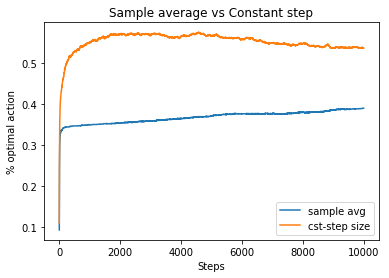

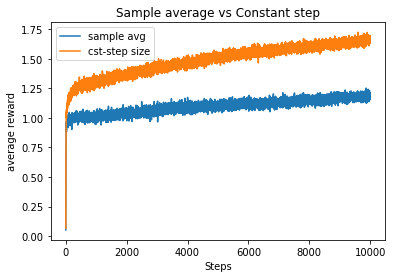

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from StochasticMultiArmBandits import Bandit

def banditSimulation(nBandits, time, bandits):
    bestActionCounts = [np.zeros(time, dtype='float') for _ in range(0, len(bandits))]
    averageRewards = [np.zeros(time, dtype='float') for _ in range(0, len(bandits))]
    for banditInd, bandit in enumerate(bandits):
        for i in range(0, nBandits):
            for t in range(0, time):
                action = bandit[i].getAction()
                reward = bandit[i].takeAction(action)
                averageRewards[banditInd][t] += reward
                if action == bandit[i].bestAction:
                    bestActionCounts[banditInd][t] += 1
        bestActionCounts[banditInd] /= nBandits
        averageRewards[banditInd] /= nBandits
    return bestActionCounts, averageRewards


# plot results
def plot_results(nBandits, time):
    bandits =[]
    bandits.append([Bandit(sampleAverages=True) for _ in range(0, nBandits) ])
    bandits.append([Bandit() for _ in range(0, nBandits) ])
    bestActionCounts, averageRewards = banditSimulation(nBandits, time, bandits)
    global figureIndex
    plt.figure(figureIndex)
    figureIndex += 1
    labels = ['sample avg', 'cst-step size']
    for label, counts in zip(labels, bestActionCounts):
        plt.plot(counts, label=label)
    plt.xlabel('Steps')
    plt.ylabel('% optimal action')
    plt.legend()
    plt.title('Sample average vs Constant step')
    plt.figure(figureIndex)

    figureIndex += 1
    for label, rewards in zip(labels, averageRewards):
        plt.plot(rewards, label=label)
    plt.xlabel('Steps')
    plt.ylabel('average reward')
    plt.legend()
    plt.title('Sample average vs Constant step')
    
figureIndex = 0
plot_results(2000, 10000)
plt.show()

Let us compare various method under a stochastic multi arm bandit model.

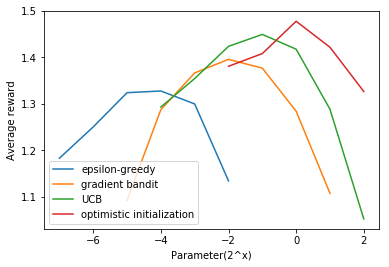

In [7]:
def compare_methods(nBandits, time):
    labels = ['epsilon-greedy', 'gradient bandit',
              'UCB', 'optimistic initialization']
    generators = [lambda epsilon: Bandit(epsilon=epsilon, sampleAverages=True),
                  lambda alpha: Bandit(gradient=True, stepSize=alpha, gradientBaseline=True),
                  lambda coef: Bandit(epsilon=0, stepSize=0.1, UCBParam=coef),
                  lambda initial: Bandit(epsilon=0, initial=initial, stepSize=0.1)]
    parameters = [np.arange(-7, -1, dtype=np.float),
                  np.arange(-5, 2, dtype=np.float),
                  np.arange(-4, 3, dtype=np.float),
                  np.arange(-2, 3, dtype=np.float)]

    bandits = [[generator(pow(2, param)) for _ in range(0, nBandits)] for generator, parameter in zip(generators, parameters) for param in parameter]
    _, averageRewards = banditSimulation(nBandits, time, bandits)
    rewards = np.sum(averageRewards, axis=1)/time

    global figureIndex
    plt.figure(figureIndex)
    figureIndex += 1
    i = 0
    for label, parameter in zip(labels, parameters):
        l = len(parameter)
        plt.plot(parameter, rewards[i:i+l], label=label)
        i += l
    plt.xlabel('Parameter(2^x)')
    plt.ylabel('Average reward')
    plt.legend()

# This will take somehow a long time
compare_methods(2000, 1000)

plt.show()